# 1.1 Import der benötigten Bibiliotheken

In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import pandas as pd
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import train_test_split as ts 
from scipy.io import wavfile
import librosa
from sklearn.svm import SVC as svc
# import soundfile as sf
from tsfresh import extract_relevant_features
from tsfresh.examples.robot_execution_failures import load_robot_execution_failures
from tsfresh import extract_features
# import soundfile as sf
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from openpyxl import Workbook
import wave
import random
from pydub import AudioSegment
import pandas as pd
from openpyxl import load_workbook


# 2.1 Data Pre Processing

# 2.1.1 Extraktion des Features MFCC = Koeffizient zur Kompakten Darstellung des Klangs 

In [22]:
path = "C:/Users/busse/ManOderFrau/menAudios/random4.wav"
def extract_mfcc(file_name, n_mfcc=13):
    y, sr = librosa.load(file_name)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    df_MFCC = pd.DataFrame(mfcc)
    for i in range(df_MFCC.shape[1]):
        df_MFCC = df_MFCC.rename(columns={i: f"MFCC{i+1}"})
    return df_MFCC


df = extract_mfcc(path)
df = pd.DataFrame(df)
df.head()








,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,...,MFCC121,MFCC122,MFCC123,MFCC124,MFCC125,MFCC126,MFCC127,MFCC128,MFCC129,MFCC130
0,-468.507446,-437.148041,-438.141541,-435.726654,-445.289185,-448.697815,-448.454712,-452.431793,-450.140015,-449.564270,...,-302.186432,-253.812592,-244.359512,-234.898544,-228.286728,-220.701813,-192.507614,-177.928345,-179.117142,-197.723755
1,71.723251,74.193314,72.822189,76.459732,73.768173,67.439972,69.693283,69.073013,70.987938,73.259521,...,29.628893,85.450638,100.656219,108.477402,122.524551,145.380127,151.017822,151.825958,159.441010,173.229828
2,-17.881117,-23.061474,-24.581457,-26.199141,-19.817793,-24.432920,-21.426355,-24.216391,-24.595440,-26.658928,...,11.538347,4.795703,-3.645721,-29.491951,-45.735657,-32.504105,-19.786695,-26.873928,-27.329720,-14.002684
3,14.898565,22.483505,23.533173,22.154448,23.427826,22.828138,22.371910,22.593472,27.893055,24.956337,...,-11.219131,-26.837458,-24.026628,-27.351154,-23.615927,-13.809611,-1.802601,6.927971,21.032639,30.066895
4,0.415976,3.182589,6.642701,4.924490,7.776299,8.815607,7.623751,10.283173,14.033911,12.181643,...,-30.051018,-58.628311,-59.046928,-52.451866,-53.345711,-52.921646,-51.088665,-51.158310,-39.989166,-27.992254


# 2.1.2 Plotten der MFCC Werte

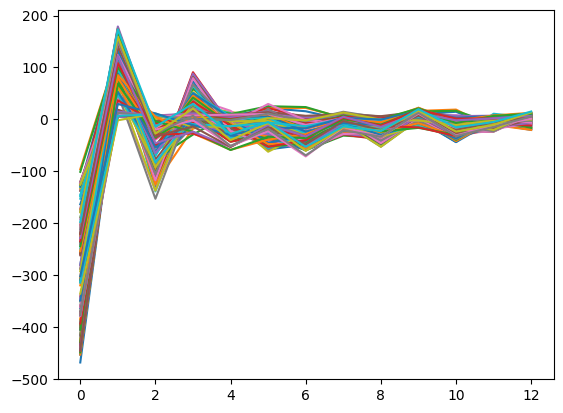

In [23]:
plt.plot(df)


# 2.2.1 Extraction und Berechnung des Features Zero Crossing Rate 

In [24]:

def extract_zcr(file_name):
    y, sr = librosa.load(file_name)
    zcr = librosa.feature.zero_crossing_rate(y)
    df_ZCR = pd.DataFrame(zcr)
    for i in range(df_ZCR.shape[1]):
        df_ZCR = df_ZCR.rename(columns={i: f"Zero Crossing Rate{i+1}"})
    return df_ZCR




def plot_zcr(file_name):
    y, sr = librosa.load(file_name)
    zcr = librosa.feature.zero_crossing_rate(y)
    
    plt.figure()
    plt.plot(zcr[0])
    plt.title('Zero Crossing Rate')
    plt.show()

zcr = extract_zcr(path)
dfzcr = pd.DataFrame(zcr)
dfzcr.head()



,Zero Crossing Rate1,Zero Crossing Rate2,Zero Crossing Rate3,Zero Crossing Rate4,Zero Crossing Rate5,Zero Crossing Rate6,Zero Crossing Rate7,Zero Crossing Rate8,Zero Crossing Rate9,Zero Crossing Rate10,...,Zero Crossing Rate121,Zero Crossing Rate122,Zero Crossing Rate123,Zero Crossing Rate124,Zero Crossing Rate125,Zero Crossing Rate126,Zero Crossing Rate127,Zero Crossing Rate128,Zero Crossing Rate129,Zero Crossing Rate130
0,0.08252,0.126465,0.157715,0.157715,0.171875,0.167969,0.173828,0.172363,0.165527,0.171875,...,0.38916,0.280273,0.20752,0.116699,0.083496,0.073242,0.064453,0.061035,0.047363,0.032227


# 2.2.2 Plotten der Zero Crossing Rate

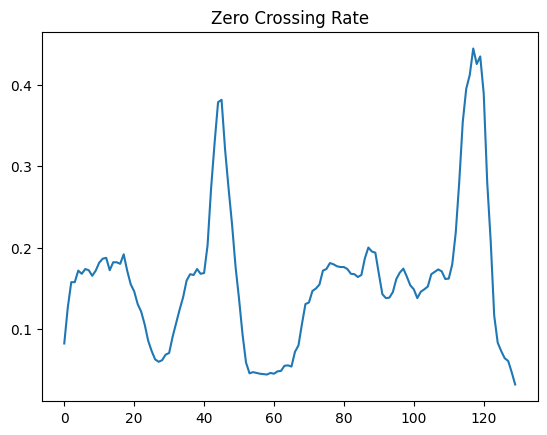

In [25]:
plot_zcr(path)

# 2.3.1 Berechnung und Extraction des Features Tonstärke

In [26]:
def extract_loudness(file_name):
    y, sr = librosa.load(file_name)
    S = np.abs(librosa.stft(y))
    loudness = librosa.feature.spectral_bandwidth(S=S)
    df_Loudness = pd.DataFrame(loudness)
    for i in range(df_Loudness.shape[1]):
        df_Loudness = df_Loudness.rename(columns={i: f"Tonstärke{i+1}"})
    return df_Loudness

def plot_loudness(file_name):
    y, sr = librosa.load(file_name)
    S = np.abs(librosa.stft(y))
    loudness = librosa.feature.spectral_bandwidth(S=S)
    


dfLoudness = extract_loudness(path)
dfLoudness.head()




,Tonstärke1,Tonstärke2,Tonstärke3,Tonstärke4,Tonstärke5,Tonstärke6,Tonstärke7,Tonstärke8,Tonstärke9,Tonstärke10,...,Tonstärke121,Tonstärke122,Tonstärke123,Tonstärke124,Tonstärke125,Tonstärke126,Tonstärke127,Tonstärke128,Tonstärke129,Tonstärke130
0,2338.349099,2313.635856,2300.446853,2239.208509,2332.160113,2304.819117,2333.123437,2280.284419,2225.44978,2178.963915,...,3137.438035,2614.757747,2357.635882,2149.222846,1867.221055,1667.28347,1576.479861,1494.323296,1416.772066,1337.389933


# 2.3.2 Plotten der Tonstärke 

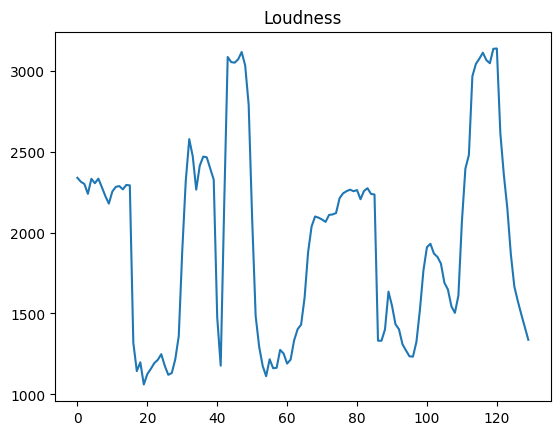

In [27]:

plot_loudness(path)


# 2.4.1 Extraction und Berechnung des Spcetral Kontrasts
#### Definition: Maß für die Energiedifferenz zwischen den Frequenzbändern eines Audiosignals. Verwendet zur Klangfarben Charakterisierung eines Audiosignals. 
       

In [28]:
def extract_snr(file_name):
    y, sr = librosa.load(file_name)
    S = np.abs(librosa.stft(y))
    snr = librosa.feature.spectral_contrast(S=S)
    dfsnr = pd.DataFrame(snr)
    for i in range(dfsnr.shape[1]):
        dfsnr = dfsnr.rename(columns={i: f"Spektral Kontrast{i+1}"})
    return dfsnr



dfSnR = extract_snr(path)
dfSnR.head()


,Spektral Kontrast1,Spektral Kontrast2,Spektral Kontrast3,Spektral Kontrast4,Spektral Kontrast5,Spektral Kontrast6,Spektral Kontrast7,Spektral Kontrast8,Spektral Kontrast9,Spektral Kontrast10,...,Spektral Kontrast121,Spektral Kontrast122,Spektral Kontrast123,Spektral Kontrast124,Spektral Kontrast125,Spektral Kontrast126,Spektral Kontrast127,Spektral Kontrast128,Spektral Kontrast129,Spektral Kontrast130
0,24.706614,25.528821,24.433890,29.899709,31.214894,28.101057,26.886294,27.744594,33.570281,31.150630,...,26.603172,20.801404,20.562684,18.587596,17.957904,20.028672,27.671732,17.572354,7.003672,2.772058
1,6.272590,20.080582,9.625600,10.970785,8.883195,12.566583,10.367219,6.949310,8.506917,14.796059,...,11.180076,15.314167,14.156179,13.993724,18.044835,17.525163,20.254065,20.236338,17.438615,9.827056
2,9.942053,14.397003,10.968323,14.681510,9.445003,9.894440,9.596645,11.138881,15.045754,19.625203,...,13.834449,8.991930,11.071899,12.946826,19.246685,10.821212,9.024284,14.204638,18.250010,19.633435
3,14.702955,11.894260,12.345837,10.161260,10.227518,9.957623,12.202953,9.966223,14.182360,12.449249,...,13.834240,15.347943,21.668077,15.184432,17.384012,16.975886,16.518268,15.760400,21.689949,19.484647
4,14.022856,16.267816,12.388619,16.451793,12.820152,12.466283,16.256287,12.956212,15.173989,14.382145,...,13.487343,11.113524,15.241930,16.563197,14.583956,17.728537,19.528404,22.505228,23.040509,20.255191


# 2.4.2 Plotten des Spektral Kontrasts 

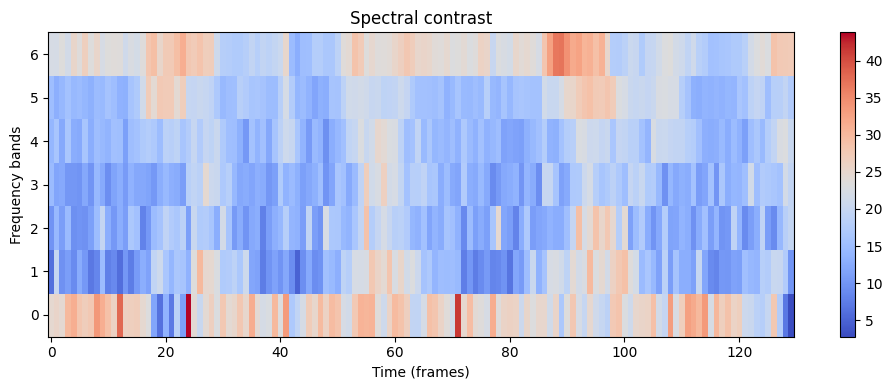

In [29]:
def plot_snr(file_name):
    snr = extract_snr(file_name)
    plt.figure(figsize=(10, 4))
    plt.imshow(snr, aspect='auto', origin='lower', cmap='coolwarm')
    plt.colorbar()
    plt.ylabel('Frequency bands')
    plt.xlabel('Time (frames)')
    plt.title('Spectral contrast')
    plt.tight_layout()
    plt.show()


plot_snr(path)    

# 2.5.1 Berechnung der Bandbreite eines Audiosignals

In [30]:
# def extract_bandwidth(file_name):
#     y, sr = librosa.load(file_name)
#     S = np.abs(librosa.stft(y))
#     bandwidth = librosa.feature.spectral_bandwidth(S=S)
#     return bandwidth

def extract_bandwidth(file_name):
    y, sr = librosa.load(file_name)
    S = np.abs(librosa.stft(y))
    bandwidth = librosa.feature.spectral_bandwidth(S=S)
    dfBandwith = pd.DataFrame(bandwidth)
    for i in range(dfBandwith.shape[1]):
        dfBandwith = dfBandwith.rename(columns={i: f"Bandbreite{i+1}"})
    return dfBandwith

dfBandwith = extract_bandwidth(path)
dfBandwith.head()


# dfBandwith.to_csv("dfBandwith.csv")
# df = pd.read_csv("dfBandwith.csv")
# df = pd.DataFrame(df)
# for i in range(df.shape[1]):
#     df = df.rename(columns={f'{i}': f"Bandbreite{i}"})

,Bandbreite1,Bandbreite2,Bandbreite3,Bandbreite4,Bandbreite5,Bandbreite6,Bandbreite7,Bandbreite8,Bandbreite9,Bandbreite10,...,Bandbreite121,Bandbreite122,Bandbreite123,Bandbreite124,Bandbreite125,Bandbreite126,Bandbreite127,Bandbreite128,Bandbreite129,Bandbreite130
0,2338.349099,2313.635856,2300.446853,2239.208509,2332.160113,2304.819117,2333.123437,2280.284419,2225.44978,2178.963915,...,3137.438035,2614.757747,2357.635882,2149.222846,1867.221055,1667.28347,1576.479861,1494.323296,1416.772066,1337.389933


# 2.5.2 Plotten der Bandbreite

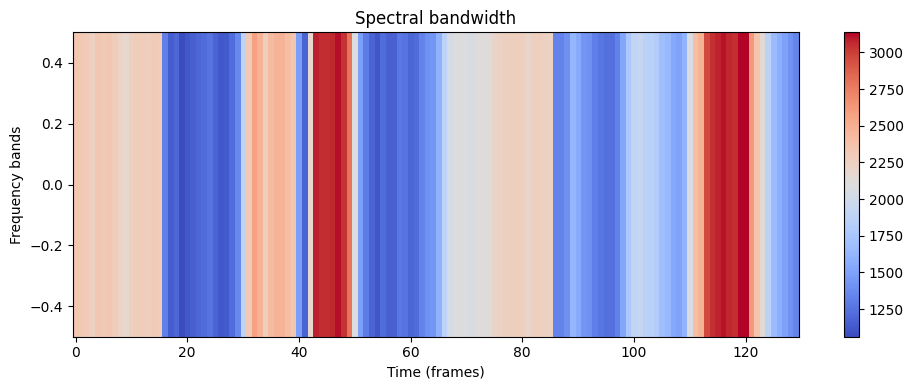

In [31]:
def plot_bandwidth(file_name):
    bandwidth = extract_bandwidth(file_name)
    plt.figure(figsize=(10, 4))
    plt.imshow(bandwidth, aspect='auto', origin='lower', cmap='coolwarm')
    plt.colorbar()
    plt.ylabel('Frequency bands')
    plt.xlabel('Time (frames)')
    plt.title('Spectral bandwidth')
    plt.tight_layout()
    plt.show()


plot_bandwidth(path)


In [32]:
df_bandwith = extract_bandwidth(path)
df_bandwith = pd.DataFrame(df_bandwith)
df_loudness = extract_loudness(path)
df_loudness = pd.DataFrame(df_loudness)
df_mfcc = extract_mfcc(path)
df_mfcc = pd.DataFrame(df_mfcc)
df_snr = extract_snr(path)
df_snr =    pd.DataFrame(df_snr)
df_zcr = extract_zcr(path)
df_zcr = pd.DataFrame(df_zcr)





df_bandwith.head()



# extract_loudness(path)
# extract_mfcc(path)
# extract_snr(path)
# extract_zcr(path)



,Bandbreite1,Bandbreite2,Bandbreite3,Bandbreite4,Bandbreite5,Bandbreite6,Bandbreite7,Bandbreite8,Bandbreite9,Bandbreite10,...,Bandbreite121,Bandbreite122,Bandbreite123,Bandbreite124,Bandbreite125,Bandbreite126,Bandbreite127,Bandbreite128,Bandbreite129,Bandbreite130
0,2338.349099,2313.635856,2300.446853,2239.208509,2332.160113,2304.819117,2333.123437,2280.284419,2225.44978,2178.963915,...,3137.438035,2614.757747,2357.635882,2149.222846,1867.221055,1667.28347,1576.479861,1494.323296,1416.772066,1337.389933


In [33]:
df_loudness.head()


,Tonstärke1,Tonstärke2,Tonstärke3,Tonstärke4,Tonstärke5,Tonstärke6,Tonstärke7,Tonstärke8,Tonstärke9,Tonstärke10,...,Tonstärke121,Tonstärke122,Tonstärke123,Tonstärke124,Tonstärke125,Tonstärke126,Tonstärke127,Tonstärke128,Tonstärke129,Tonstärke130
0,2338.349099,2313.635856,2300.446853,2239.208509,2332.160113,2304.819117,2333.123437,2280.284419,2225.44978,2178.963915,...,3137.438035,2614.757747,2357.635882,2149.222846,1867.221055,1667.28347,1576.479861,1494.323296,1416.772066,1337.389933


In [34]:
df_mfcc.head()


,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,...,MFCC121,MFCC122,MFCC123,MFCC124,MFCC125,MFCC126,MFCC127,MFCC128,MFCC129,MFCC130
0,-468.507446,-437.148041,-438.141541,-435.726654,-445.289185,-448.697815,-448.454712,-452.431793,-450.140015,-449.564270,...,-302.186432,-253.812592,-244.359512,-234.898544,-228.286728,-220.701813,-192.507614,-177.928345,-179.117142,-197.723755
1,71.723251,74.193314,72.822189,76.459732,73.768173,67.439972,69.693283,69.073013,70.987938,73.259521,...,29.628893,85.450638,100.656219,108.477402,122.524551,145.380127,151.017822,151.825958,159.441010,173.229828
2,-17.881117,-23.061474,-24.581457,-26.199141,-19.817793,-24.432920,-21.426355,-24.216391,-24.595440,-26.658928,...,11.538347,4.795703,-3.645721,-29.491951,-45.735657,-32.504105,-19.786695,-26.873928,-27.329720,-14.002684
3,14.898565,22.483505,23.533173,22.154448,23.427826,22.828138,22.371910,22.593472,27.893055,24.956337,...,-11.219131,-26.837458,-24.026628,-27.351154,-23.615927,-13.809611,-1.802601,6.927971,21.032639,30.066895
4,0.415976,3.182589,6.642701,4.924490,7.776299,8.815607,7.623751,10.283173,14.033911,12.181643,...,-30.051018,-58.628311,-59.046928,-52.451866,-53.345711,-52.921646,-51.088665,-51.158310,-39.989166,-27.992254


In [35]:
df_snr.head()


,Spektral Kontrast1,Spektral Kontrast2,Spektral Kontrast3,Spektral Kontrast4,Spektral Kontrast5,Spektral Kontrast6,Spektral Kontrast7,Spektral Kontrast8,Spektral Kontrast9,Spektral Kontrast10,...,Spektral Kontrast121,Spektral Kontrast122,Spektral Kontrast123,Spektral Kontrast124,Spektral Kontrast125,Spektral Kontrast126,Spektral Kontrast127,Spektral Kontrast128,Spektral Kontrast129,Spektral Kontrast130
0,24.706614,25.528821,24.433890,29.899709,31.214894,28.101057,26.886294,27.744594,33.570281,31.150630,...,26.603172,20.801404,20.562684,18.587596,17.957904,20.028672,27.671732,17.572354,7.003672,2.772058
1,6.272590,20.080582,9.625600,10.970785,8.883195,12.566583,10.367219,6.949310,8.506917,14.796059,...,11.180076,15.314167,14.156179,13.993724,18.044835,17.525163,20.254065,20.236338,17.438615,9.827056
2,9.942053,14.397003,10.968323,14.681510,9.445003,9.894440,9.596645,11.138881,15.045754,19.625203,...,13.834449,8.991930,11.071899,12.946826,19.246685,10.821212,9.024284,14.204638,18.250010,19.633435
3,14.702955,11.894260,12.345837,10.161260,10.227518,9.957623,12.202953,9.966223,14.182360,12.449249,...,13.834240,15.347943,21.668077,15.184432,17.384012,16.975886,16.518268,15.760400,21.689949,19.484647
4,14.022856,16.267816,12.388619,16.451793,12.820152,12.466283,16.256287,12.956212,15.173989,14.382145,...,13.487343,11.113524,15.241930,16.563197,14.583956,17.728537,19.528404,22.505228,23.040509,20.255191


In [36]:
df_zcr.head()

,Zero Crossing Rate1,Zero Crossing Rate2,Zero Crossing Rate3,Zero Crossing Rate4,Zero Crossing Rate5,Zero Crossing Rate6,Zero Crossing Rate7,Zero Crossing Rate8,Zero Crossing Rate9,Zero Crossing Rate10,...,Zero Crossing Rate121,Zero Crossing Rate122,Zero Crossing Rate123,Zero Crossing Rate124,Zero Crossing Rate125,Zero Crossing Rate126,Zero Crossing Rate127,Zero Crossing Rate128,Zero Crossing Rate129,Zero Crossing Rate130
0,0.08252,0.126465,0.157715,0.157715,0.171875,0.167969,0.173828,0.172363,0.165527,0.171875,...,0.38916,0.280273,0.20752,0.116699,0.083496,0.073242,0.064453,0.061035,0.047363,0.032227


# 3.1 Machine Learning Modell trainieren

## 3.1.1 Daten in eine Form bringen mit dem das Machine Learning Model trainiert werden kann

## 3.2.1 Aufsplitten von WAV Dateien, in 3 Sekunden Sequenzen

In [37]:



def split_wav(destinationPath, wav_file, segment_length=3000):
    audio = AudioSegment.from_wav(wav_file)

    for i in range(0, len(audio), segment_length):
        segment = audio[i:i+segment_length]
        segment.export(f"{destinationPath}segment__{i-10//segment_length}.wav", format="wav")
        


split_wav("C:/Users/busse/ManOderFrau/menAudios/","C:/Users/busse/ManOderFrau/menAudios/1.wav", segment_length=3000)
        

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/busse/ManOderFrau/menAudios/1.wav'

In [ ]:

def getDuration(input_file_path,duration):
    with wave.open(input_file_path, 'rb') as input_wav:
        n_channels = input_wav.getnchannels()
        sample_width = input_wav.getsampwidth()
        frame_rate = input_wav.getframerate()
        n_frames = input_wav.getnframes()

        n_frames_duration = int(frame_rate * duration)
        return n_frames_duration 
    
def get_n_frames_duration (input_file_path,duration):
    with wave.open(input_file_path, 'rb') as input_wav:
        n_channels = input_wav.getnchannels()
        sample_width = input_wav.getsampwidth()
        frame_rate = input_wav.getframerate()
        n_frames = input_wav.getnframes()

        n_frames_duration = int(frame_rate * duration)
        return n_frames_duration 
    

def extract_random_sequence(input_file_path, output_file_path, duration=3):
    with wave.open(input_file_path, 'rb') as input_wav:
        n_channels = input_wav.getnchannels()
        sample_width = input_wav.getsampwidth()
        frame_rate = input_wav.getframerate()
        n_frames = input_wav.getnframes()

        n_frames_duration = int(frame_rate * duration)

        if n_frames_duration > n_frames:
            raise ValueError(f"Die angegebene Dauer ({duration} Sekunden) ist länger als die Gesamtdauer der Datei ({n_frames / frame_rate} Sekunden).")

        start_frame = random.randint(0, n_frames - n_frames_duration)

        input_wav.setpos(start_frame)
        frames = input_wav.readframes(n_frames_duration)


    with wave.open(output_file_path, 'wb') as output_wav:
        output_wav.setparams((n_channels, sample_width, frame_rate, n_frames_duration, 'NONE', 'not compressed'))
        output_wav.writeframes(frames)


def get_n_frames(input_file_path):
      with wave.open(input_file_path, 'rb') as input_wav:
        n_channels = input_wav.getnchannels()
        sample_width = input_wav.getsampwidth()
        frame_rate = input_wav.getframerate()
        n_frames = input_wav.getnframes()

        # n_frames_duration = int(frame_rate * duration)
        return n_frames 


def split_multiple_frames(input_file_path,output_file_path,duration=3):
    i = 0
    for files in os.listdir(input_file_path):

        if files.endswith(".wav"):
                
            # if get_n_frames_duration("longMenAudios/" + files,duration=3) > get_n_frames("longMenAudios/" + files):
                extract_random_sequence(input_file_path+ files,output_file_path  + f"Random{i}duration_{duration}_.wav",duration=3)
                
                print(f"Random{i}duration_{duration}")
                i = i+1



def rename_data(file_path="MenSequences" or "WomenSequences",files_to_rename="Random"):
    i = 0
    for files in os.listdir(file_path):
        if files.endswith(".wav"):
            new_name = f"{files_to_rename}_{i}.wav"
            os.rename(os.path.join(file_path, files), os.path.join(file_path, new_name))
            i += 1






# split_multiple_frames("C:/Users/busse/ManOderFrau/MenMP4/",output_file_path="C:/Users/busse/ManOderFrau/MenMP4/",duration=3)

# mp4_to_wav("C:/Users/busse/ManOderFrau/MenMP4/Microphone.mp4","C:/Users/busse/ManOderFrau/MenMP4/Test23.06.2023.wav")
# split_multiple_frames("C:/Users/busse/ManOderFrau/MenMP4/","C:/Users/busse/ManOderFrau/menData/",duration=3)
split_multiple_frames("C:/Users/busse/ManOderFrau/MenMP4/","C:/Users/busse/ManOderFrau/MenMp4/",duration=3)

### 3.1.1.1 Daten nur von einer Frau labeln

In [ ]:
bandwidth_vec = df_bandwith.values.flatten()
zcr_vec = df_zcr.values.flatten()
sc_vec = df_snr.values.flatten()
mfcc_vec = df_mfcc.values.flatten()
chroma_vec = df_loudness.values.flatten()

# X = np.hstack([bandwidth_vec, zcr_vec, sc_vec, mfcc_vec, chroma_vec])

df_bandwith = pd.DataFrame(index=[0], columns=['Bandbreite'])
df_loudness = pd.DataFrame(index=[1], columns= ['Tonstärke'])
df_snr = pd.DataFrame(index=[2], columns=   ['Spektral Kontrast']) 
df_zcr = pd.DataFrame(index=[3], columns= ['Zero Crossing Rate'])
df_mfcc = pd.DataFrame(index=[4], columns= ['MFCC'])

# Speichere den Vektor als Liste in der Zelle des DataFrames
# df_bandwith.at[0, 'Bandbreite'] = bandwidth_vec.tolist()
# df_loudness.at[4,'Tonstärke'] = chroma_vec.tolist()
# df_snr.at[0, 'Spektral Kontrast'] = sc_vec.tolist()
# df_zcr.at[3, 'Zero Crossing Rate'] = zcr_vec.tolist()
# df_mfcc.at[4, 'MFCC'] = mfcc_vec.tolist()


# df_loudness
# df_snr
# df_zcr
# df_mfcc

In [ ]:
df_bandwith.at[0, 'Bandbreite'] = bandwidth_vec.tolist()
df_bandwith['id']=range(1,len(df_bandwith)+1)

df_bandwith


In [ ]:
df_loudness.at[1,'Tonstärke'] = chroma_vec.tolist()
df_loudness['id'] = range(1,len(df_loudness)+1)

df_loudness

In [ ]:
df_snr.at[2, 'Spektral Kontrast'] = sc_vec.tolist()
df_snr['id'] = range(1,len(df_snr)+1)
df_snr
# df_zcr["id"] = range(1,len(df_zcr)+1)
# df_mfcc ["id"] = range(1,len(df_mfcc)+1)

# df_snr.at[0, 'Spektral Kontrast'] = sc_vec.tolist()

In [ ]:
df_zcr.at[3, 'Zero Crossing Rate'] = zcr_vec.tolist()
df_zcr['id'] = range(1,len(df_zcr)+1)
df_zcr

In [ ]:
df_mfcc.at[4, 'MFCC'] = mfcc_vec.tolist()
df_mfcc ['id'] = range(1,len(df_mfcc)+1)
df_mfcc

In [ ]:
# mergeBandwithLoudness = pd.merge(df_bandwith, df_loudness, on='id')


merge1 = pd.merge(df_mfcc,df_zcr,on='id')
merge1

# mergeSnrZcr = pd.merge(df_snr,df_zcr,on='id')
# mergeBandwithLoudness



In [ ]:
merge2 = pd.merge(merge1, df_loudness, on='id')
merge2 

In [ ]:
merge3 = pd.merge(merge2, df_snr,on='id')
merge3

In [ ]:
merge4 = pd.merge(merge3, df_bandwith,on="id")
merge4

In [ ]:
merge4['Label'] = ['Frau']
merge4

### 3.1.1.2 Daten nur von einem Mann labeln 

In [ ]:
from moviepy.editor import *
from pydub import AudioSegment



df_mfcc2 = extract_mfcc("C:/Users/busse/Recognizer/Recognizer/tempDir/Random9.wav",1)
df_mfcc2 = df_mfcc2.iloc[:, :10]
print(df_mfcc2)

def get_features_df_csv(nameOfCsv,ordner_path):
    i = 0
    for file in os.listdir(ordner_path):
        print(file)
        if file.endswith('.wav'):
            newPath = ordner_path + "/" + file
            df_mfcc2 = extract_mfcc(newPath)
            df_loudness2 = extract_loudness(newPath)
            df_snr2 = extract_snr(newPath)
            df_zcr2 = extract_zcr(newPath)
            df_bandwith2 = extract_bandwidth(newPath)
            df_bandwith2 = pd.DataFrame(df_bandwith2)
            df_loudness2 = pd.DataFrame(df_loudness2)
            df_snr2 = pd.DataFrame(df_snr2)
            df_zcr2 = pd.DataFrame(df_zcr2)
            df_mfcc2 = pd.DataFrame(df_mfcc2)
            df_bandwith2 = df_bandwith2.iloc[:, :80]
            df_loudness2 = df_loudness2.iloc[:, :80]
            df_snr2 = df_snr2.iloc[:, :80]
            df_zcr2 = df_zcr2.iloc[:, :80]
            df_mfcc2 = df_mfcc2.iloc[:, :80]

            bandwidth_vec2 = df_bandwith2.values.flatten()
            zcr_vec2 = df_zcr2.values.flatten()
            sc_vec2 = df_snr2.values.flatten()
            mfcc_vec2 = df_mfcc2.values.flatten()
            chroma_vec2 = df_loudness2.values.flatten()

            df_bandwith2 = pd.DataFrame(index=[0], columns=['Bandbreite'])
            df_loudness2 = pd.DataFrame(index=[1], columns= ['Tonstärke'])
            df_snr2 = pd.DataFrame(index=[2], columns=   ['Spektral Kontrast']) 
            df_zcr2 = pd.DataFrame(index=[3], columns= ['Zero Crossing Rate'])
            df_mfcc2 = pd.DataFrame(index=[4], columns= ['MFCC'])


            df_bandwith2.at[0, 'Bandbreite'] = bandwidth_vec2.tolist()
            df_loudness2.at[1,'Tonstärke'] = chroma_vec2.tolist()
            df_snr2.at[2, 'Spektral Kontrast'] = sc_vec2.tolist()
            df_zcr2.at[3, 'Zero Crossing Rate'] = zcr_vec2.tolist()
            df_mfcc2.at[4, 'MFCC'] = mfcc_vec2.tolist()

            df_bandwith2['id']=range(1,len(df_bandwith2)+1)
            df_loudness2['id']=range(1,len(df_loudness2)+1)
            df_snr2['id']=range(1,len(df_snr2)+1)
            df_zcr2['id']=range(1,len(df_zcr2)+1)
            df_mfcc2['id']=range(1,len(df_mfcc2)+1)



            mergeFirst = pd.merge(df_mfcc2,df_zcr2,on='id')
            mergeSecond = pd.merge(mergeFirst, df_loudness2, on='id')
            mergeThird = pd.merge(mergeSecond, df_snr2,on='id')
            mergeForth = pd.merge(mergeThird, df_bandwith2,on='id')
            mergeForth['Frau/Mann'] = ['Frau']
            mergeForth.to_csv(f"{nameOfCsv}{i}.csv")

            
            i+=1



def get_features_df_excel(ordner_path, destinationPath, nameOfXLSX, numberOfXLSXData, labelType, numberOfColumns):
    i = 0
    for file in os.listdir(ordner_path):
        print(file)
        if i == numberOfXLSXData: 
            return
        if file.endswith('.wav'):
            print(ordner_path + file)
            newPath = ordner_path + "/" + file
            df_mfcc2 = extract_mfcc(newPath)
            df_loudness2 = extract_loudness(newPath)
            df_snr2 = extract_snr(newPath)
            df_zcr2 = extract_zcr(newPath)
            df_bandwith2 = extract_bandwidth(newPath)
            df_bandwith2 = pd.DataFrame(df_bandwith2)
            df_loudness2 = pd.DataFrame(df_loudness2)
            df_snr2 = pd.DataFrame(df_snr2)
            df_zcr2 = pd.DataFrame(df_zcr2)
            df_mfcc2 = pd.DataFrame(df_mfcc2)
            df_bandwith2 = df_bandwith2.iloc[:, :numberOfColumns]
            df_loudness2 = df_loudness2.iloc[:, :numberOfColumns]
            df_snr2 = df_snr2.iloc[:, :numberOfColumns]
            df_zcr2 = df_zcr2.iloc[:, :numberOfColumns]
            df_mfcc2 = df_mfcc2.iloc[:, :numberOfColumns]

    
            df_bandwith2['id']=range(1,len(df_bandwith2)+1)
            df_loudness2['id']=range(1,len(df_loudness2)+1)
            df_snr2['id']=range(1,len(df_snr2)+1)
            df_zcr2['id']=range(1,len(df_zcr2)+1)
            df_mfcc2['id']=range(1,len(df_mfcc2)+1)



            mergeFirst = pd.merge(df_mfcc2,df_zcr2,on='id')
            mergeSecond = pd.merge(mergeFirst, df_loudness2, on='id')
            mergeThird = pd.merge(mergeSecond, df_snr2,on='id')
            mergeForth = pd.merge(mergeThird, df_bandwith2,on='id')
            mergeForth.dropna()
            
            num_rows = mergeForth.shape[0]
  
            for i in range(num_rows):
                mergeForth.at[i,'id'] = i
                i = i+1
                mergeForth = mergeForth.rename(columns={'Unnamed: 0': 'ID'})
                mergeForth.dropna()
                # mergeForth = mergeForth.drop("id", axis=1)
                # mergeForth.head()
                # mergeForth = mergeForth.sample(frac=1).reset_index(drop=True)
                if labelType == "Frau" or labelType == "Mann":
                    mergeForth['label'] = [f'{labelType}']
                    mergeForth.to_excel(f"{destinationPath}{nameOfXLSX}{i}.xlsx")
                    print(mergeForth)

            
        i+=1


                        


def mp4_to_wav(mp4_file, wav_file):
    audio = AudioSegment.from_file(mp4_file, format="mp4")
    audio.export(wav_file, format="wav")



def split_wav(wav_file, segment_length=3000):
    audio = AudioSegment.from_wav(wav_file)
    for i in range(0, len(audio), segment_length):
        segment = audio[i:i+segment_length]
        segment.export(f"segment_{i//segment_length}.wav", format="wav")


# get_features_df_excel("C:/Users/busse/ManOderFrau/150WS","C:/Users/busse/ManOderFrau/TrainData/","WomenTestDataForMLTraining",150,"Frau")
# get_features_df_excel("C:/Users/busse/ManOderFrau/MenSequences","C:/Users/busse/ManOderFrau/TrainData/","MenTestDataForMLTraining",150,"Mann")
# get_features_df_excel("C:/Users/busse/ManOderFrau/MenSequencesTest/","menData/" ,"X_Men_Test_Data",2,"Mann",10)



        MFCC1       MFCC2       MFCC3       MFCC4       MFCC5       MFCC6  \
0 -166.633865 -186.619522 -213.107544 -211.602692 -221.239563 -220.715073   

        MFCC7       MFCC8      MFCC9     MFCC10  
0 -222.350464 -224.720032 -236.96286 -260.38739  


In [ ]:

def mp4_to_wav(mp4_file, wav_file):
    audio = AudioSegment.from_file(mp4_file, format="mp4")
    audio.export(wav_file, format="wav")





get_features_df_excel("C:/Users/busse/ManOderFrau/WomenSequences/","C:/Users/busse/ManOderFrau/womenData/","newWomanDataForMLTraining",150,"Frau")

# 3.2.1 Machine Learning Model trainieren


In [ ]:
# import csv


# folder_path = 'C:/Users/busse/ManOderFrau/Woman'  # Pfad zum Ordner mit den CSV-Dateien


# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
#         with open(file_path, 'r', newline='', encoding='utf-8') as input_file, open(file_path + '.tmp', 'w', newline='', encoding='utf-8') as output_file:
#             reader = csv.reader(input_file)
#             writer = csv.writer(output_file, quoting=csv.QUOTE_NONE, escapechar='\\')
#             for row in reader:
#                 writer.writerow(row)
#         os.replace(file_path + '.tmp', file_path)

In [ ]:
folder_path = 'C:/Users/busse/ManOderFrau/WomenTestXLSX'  # Pfad zum Ordner mit den Excel-Dateien

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        for col in df.columns:
            df[col] = df[col].astype(str).str.replace('[', '').str.replace(']', '')
        df.to_excel(file_path, index=False)

In [ ]:
folder_path =  'C:/Users/busse/ManOderFrau/WomenTestXLSX'  # Pfad zum Ordner mit den Excel-Dateien

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
        df = df[['Unnamed: 0', 'id', 'MFCC', 'Zero Crossing Rate', 'Tonstärke', 'Spektral Kontrast', 'Bandbreite', 'Frau/Mann']]
        df.to_excel(file_path, index=False)


In [ ]:
# import csv

# folder_path = 'C:/Users/busse/ManOderFrau/WomenTestXLSX'  # Pfad zum Ordner mit den CSV-Dateien

# for filename in os.listdir(folder_path):
#     if filename.endswith('.csv'):
#         file_path = os.path.join(folder_path, filename)
#         with open(file_path, 'r', newline='', encoding='utf-8') as input_file, open(file_path + '.tmp', 'w', newline='', encoding='utf-8') as output_file:
#             reader = csv.reader(input_file)
#             writer = csv.writer(output_file, quoting=csv.QUOTE_NONE)
#             for row in reader:
#                 new_row = [col.replace('\\', '') for col in row]
#                 writer.writerow(new_row)
#         os.replace(file_path + '.tmp', file_path)

In [ ]:
# ordner_path = "C:/Users/busse/ManOderFrau/Woman/"

# def transformDFforMLModel():
#     for file in os.listdir(ordner_path):
#         print(file)
#         # if file.endswith('.csv'):
        #     data = pd.read_csv(ordner_path+file)
        #     data['Bandbreite'] = pd.to_numeric(data['Bandbreite'],errors='coerce')

In [ ]:
'C:/Users/busse/ManOderFrau/WomenTestXLSX'

def merge_excel_data_sets(folder_path,output_file):
    folder_path = folder_path
    output_file = output_file

    xlsx_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.xlsx')]


    df = pd.concat((pd.read_excel(f) for f in xlsx_files))


    df.to_excel(output_file, index=False)


merge_excel_data_sets("C:/Users/busse/ManOderFrau/TrainData","TrainData.xlsx")



In [ ]:
data = pd.read_excel("TrainData.xlsx",sheet_name="Sheet1")
df = pd.DataFrame(data)

num_rows = df.shape[0]
num_rows
for i in range(num_rows):
    df.at[i,'id'] = i
    i = i+1
df = df.rename(columns={'Unnamed: 0': 'ID'})
df.dropna()
df = df.drop("id", axis=1)
df.head()
df = df.sample(frac=1).reset_index(drop=True)
df.to_excel("TrainData.xlsx",index=True)


# def shuffle_rows(file_path):

#     df = pd.read_excel(file_path)

    
#     df = df.sample(frac=1).reset_index(drop=True)

#     # Schreiben des DataFrame in die Excel-Datei
#     book = load_workbook(file_path)
#     writer = pd.ExcelWriter(file_path, engine='openpyxl')
#     writer.book = book
#     df.to_excel(writer, index=False)
#     writer.save()



# shuffle_rows("C:/Users/busse/ManOderFrau/TrainData.xlsx")   


In [ ]:
df = pd.read_excel('C:/Users/busse/ManOderFrau/merged2.xlsx')

# `id`-Spalte neu nummerieren
df = df.reset_index(drop=True)
df['id'] = df.index + 1

# Ergebnis in eine neue Excel-Datei schreiben
df.to_excel('output.xlsx', index=False)

In [ ]:
data = pd.read_csv("merged.csv")
print(data)

In [ ]:
# data = pd.read_csv('output.xlsx')
# # data['Bandbreite'] = pd.to_numeric(data['Bandbreite'],errors='coerce')
# # data1 = pd.read_csv("C:/Users/busse/ManOderFrau/Woman/Women_Data1.csv")
# # data1
# # print(data['Bandbreite'])
# X = data.drop(['Frau/Mann','Bandbreite'], axis=1)
# X
# X = data.drop('Frau/Mann', axis=1)
# X.head()
# y = data['Frau/Mann']

# print(X.dtypes)


# print(data['Bandbreite'])
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


# # Trainings- und Testdaten aufteilen
# X_train, X_test, y_train, y_test = ts(X, y, test_size=0.2)

# # Neuronales Netzwerk erstellen
# model = Sequential()
# model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Neuronales Netzwerk trainieren
# model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import accuracy_score


def preprocess_data(data, model):
    X = data.drop(["label"], axis=1)
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    feature_names = model.get_feature_names_out()
    X_selected = X_scaled.loc[:, feature_names]
    return X_selected

def elim_non_equal_columns_excels(excel1, excel2):
    data1 = pd.read_excel(excel1)
    data2 = pd.read_excel(excel2)

    # Find the common columns in both dataframes
    common_columns = data1.columns.intersection(data2.columns)

    # Select only the common columns from both dataframes
    data1_common = data1[common_columns]
    data2_common = data2[common_columns]

    # Save the resulting dataframes to new Excel files
    data1_common.to_excel(excel1, index=False)
    data2_common.to_excel(excel2, index=False)



# elim_non_equal_columns_excels("ReadyData/extractedTestWomanData0.xlsx","C:/Users/busse/ManOderFrau/TrainData.xlsx")






data = pd.read_excel("C:/Users/busse/ManOderFrau/TrainData.xlsx")
X = data.drop(["label"],axis=1)
y = data["label"]
dataTest = pd.read_excel('C:/Users/busse/ManOderFrau/menData/X_Men_Test_Data1.xlsx',sheet_name='Sheet1')

XdataTest = dataTest.drop(["label","Unnamed: 0","id"],axis=1)
XdataTest = XdataTest.sample(frac=1)
yDataTest = dataTest["label"]
scaler1 = preprocessing.StandardScaler().fit(X)
scaler2 = preprocessing.StandardScaler().fit(XdataTest)
X_scaled = scaler1.transform(X)
XdataTest_scaled = scaler2.transform(XdataTest)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
clf = SVC(kernel='linear')
model = clf.fit(X_train, y_train)

with open ('ML_Models/modelTrainData.pkl', 'rb') as f:
        model = pickle.load(f)


# with open('ML_Models/modelTrainData.pkl', 'wb') as f:
#         pickle.dump(model, f)


y_pred = model.predict(XdataTest)
print(classification_report(yDataTest, y_pred))



print(y_pred)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print('Trainingsgenauigkeit:', train_acc)
print('Testgenauigkeit:', test_acc)

# print(clf.predict(XdataTest_scaled))


# get_features_df_excel("C:/Users/busse/ManOderFrau/trance/","extractedTestWomanData",1,"Frau")

# y_pred = clf.predict(XdataTest_scaled)
# print(classification_report(y_test, y_pred))

# with open('model.pkl', 'wb') as f:
#         pickle.dump(model, f)


# print(y_pred)



In [ ]:
get_features_df_excel("WomenSequences/","WomenDataNeuronalesNetz/","newWomanDataForNNTraining",150,"0",10)


FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'WomenSequences/'

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import tqdm
from keras.models import Sequential
from keras.layers  import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data = pd.read_excel("TrainData.xlsx")
data2 = pd.read_excel("TrainData/WomenTestDataForMLTraining123.xlsx")
data.dropna()
X1= data.drop(["label"],axis=1)
y1 = data["label"]
X2 = data2.drop(["label"],axis=1)
y2 = data2["label"]


# X1 = X1.dropna()
# y1 = y1.dropna()
# X2 = X2.dropna()
# y2 = y2.dropna()

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
y_train = pd.to_numeric(y_train, errors="coerce")
y_test = pd.to_numeric(y_test, errors="coerce")
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'learning_rate_init': [0.1, 0.01, 0.001]
}

model = MLPClassifier(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X1, y1)
print('Beste Hyperparameter:', grid_search.best_params_)
with open("ML_Models/MLP.pkl", "rb") as f:
    model = pickle.load(f)
for i in range(len(X_test)):
    x = X_test.iloc[[i]]
    y = model.predict(x)
    print(f'x={x}, y={y}')
# model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', learning_rate_init=0.001)

# model = model.fit(X1, y1)

# y_pred = model.predict(X2)
# print(y_pred)
# with open ("ML_Models/MLP.pkl", "wb") as f:
#     pickle.dump(model, f)
# Überprüfen Sie, ob es NaN-Werte in den Trainingsdaten gibt
# print(X_train.isna().sum())
# print(y_train.isna().sum())

# Überprüfen Sie, ob es NaN-Werte in den Testdaten gibt
# print(X_test.isna().sum())
# print(y_test.isna().sum())


    
# # model_pred_X1 =model.predict(X1)

#     model_pred_X2 = model.predict(X2)
#     # print(model_pred_X1)
#     # print(model_pred_X2)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(y_test_pred,y_train_pred)
    y_train_pred
    train_acc = accuracy_score(y_train,y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)  
    print('Trainingsgenauigkeit:', train_acc)
    print('Testgenauigkeit:', test_acc)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Die Größe der Trainings- und Testsets ausgeben
# print('Trainingsset:', X_train.shape[0])
# print('Testset:', X_test.shape[0])

# 3.3.1 k-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Laden Sie Ihre Daten hier
# X = ...
# y = ...

# Teilen Sie die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Erstellen Sie das k-NN-Modell
knn = KNeighborsClassifier(n_neighbors=5)

# Trainieren Sie das Modell mit den Trainingsdaten
knn.fit(X_train, y_train)

# Vorhersagen für das Testset treffen
y_pred = knn.predict(X_test)

# Berechnen Sie die Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print('Genauigkeit:', accuracy)

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import tqdm
from keras.models import Sequential
from keras.layers  import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier




# with open ('ML_Models/modelTrainData.pkl', 'rb') as f:
#         model = pickle.load(f)

data = pd.read_excel("merged2.xlsx")
data2 = pd.read_excel("TrainData/WomenTestDataForMLTraining123.xlsx")
# Lade das vorbereitete Dataset
X1= data.drop(["label"],axis=1)
y1 = data["label"]
X2 = data2.drop(["label"],axis=1)
y2 = data2["label"]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
y_train = pd.to_numeric(y_train, errors="coerce")
y_test = pd.to_numeric(y_test, errors="coerce")
model = Sequential()
model.add(Dense(16, input_shape=(X1.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# Erstellen Sie ein EarlyStopping-Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Trainieren Sie das Modell mit dem EarlyStopping-Callback
history = model.fit(X_train, y_train, epochs=1000, batch_size=32,
                validation_data=(X_test, y_test), callbacks=[early_stopping])

y_pred = model.predict(X1)
y_pred = (y_pred > 0.5).astype(int)


with open('ML_Models/NeuronalesNetz.pkl', 'wb') as f:
        pickle.dump(model, f)
# print(y_pred[:10])

# Zugriff auf die Genauigkeitswerte
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Die Genauigkeitswerte ausgeben
print('Trainingsgenauigkeit:', acc)
print('Validierungsgenauigkeit:', val_acc)


# print(y_pred[:100])


In [ ]:
data = pd.read_excel("output.xlsx")
data

X = data.drop(['Frau/Mann','Bandbreite'], axis=1)
X

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Lese die Trainingsdaten aus einer Excel-Datei
df = pd.read_excel('C:/Users/busse/ManOderFrau/MegedDataWomen.xlsx')
X = df.iloc[:, :-1].astype(str).apply(lambda x: x.str.split(',').explode()).values.astype(float)
# Wandle die Daten in NumPy-Arrays um
X = df.iloc[:, :-1].apply(lambda x: x.str.split(',').explode()).values.astype(float)
y = df.iloc[:, -1].values

# Erstelle das Random Forest-Modell
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Trainiere das Random Forest-Modell
clf.fit(X, y)

# Teste das Random Forest-Modell
print(clf.predict([[0, 0, 0], [1, 1, 1]]))

# Lese die Trainingsdaten aus einer Excel-Datei
# df = pd.read_excel('cleaned_data.xlsx')
# X = df.iloc[:, :-1].astype(str).apply(lambda x: x.str.split(',').explode()).values.astype(float)
# Wandle die Daten in NumPy-Arrays um
# X = df.iloc[:, :-1].apply(lambda x: x.str.split(',').explode()).values.astype(float)
# y = df.iloc[:, -1].values

# # Erstelle das neuronale Netz
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(5, 2), random_state=1)

# # Trainiere das neuronale Netz
# clf.fit(X, y)

# # Teste das neuronale Netz
# print(clf.predict([[0, 0, 0], [1, 1, 1]]))








# Lese die Trainingsdaten aus einer Excel-Datei
# df = pd.read_excel('output.xlsx')
# df['Bandbreite'] = pd.to_numeric(data['Bandbreite'],errors='coerce')
# df['MFCC'] = pd.to_numeric(data['MFCC'],errors='coerce')
# df['Zero Crossing Rate'] = pd.to_numeric(data['Zero Crossing Rate'],errors='coerce')
# df['Tonstärke'] = pd.to_numeric(data['Tonstärke'],errors='coerce')
# df['Spektral Kontrast'] = pd.to_numeric(data['Spektral Kontrast'],errors='coerce')

# df
# # Wandle die Daten in NumPy-Arrays um
# X = df[['MFCC', 'Zero Crossing Rate','Tonstärke','Spektral Kontrast','Bandbreite']].values
# X = df.drop(['Zero Crossing Rate','Tonstärke','Spektral Kontrast','Bandbreite'], axis=1)
# y = df['Frau/Mann'].values

# # Wandle die Daten in NumPy-Arrays um
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

# # Erstelle das neuronale Netz
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
#                     hidden_layer_sizes=(5, 2), random_state=1)

# # Trainiere das neuronale Netz
# clf.fit(X, y)

# # Teste das neuronale Netz
# print(clf.predict([[0, 0, 0], [1, 1, 1]]))

In [ ]:
def split_cells(file_name):
    # Lese die Daten aus der Excel-Datei
    df = pd.read_excel(file_name)

    # Erstelle einen neuen DataFrame, um die bereinigten Daten zu speichern
    new_df = pd.DataFrame()

    # Gehe durch jede Spalte im DataFrame
    for col in df.columns:
        # Wandle die Zellen in der Spalte in Listen um
        data = df[col].str.split(',')

        # Finde die maximale Anzahl von Elementen in den Listen
        max_len = data.str.len().max()

        # Erstelle neue Spalten für jedes Element in den Listen
        for i in range(max_len):
            new_col_name = f'{col}_{i}'
            new_df[new_col_name] = data.str[i]

    # Speichere die bereinigten Daten in einer neuen Excel-Datei
    new_df.to_excel('split_data.xlsx', index=False)

# Verwende die Funktion, um die Daten aus den Zellen einer Excel-Datei zu lesen und in neue Spalten zu schreiben
split_cells('output.xlsx')

In [ ]:
import pandas as pd

def remove_duplicate_labels(file_name):
    # Lese die Daten aus der Excel-Datei
    df = pd.read_excel(file_name)

    # Finde doppelte Labels
    duplicates = df.columns[df.columns.duplicated()]

    # Entferne doppelte Labels
    df = df.loc[:, ~df.columns.duplicated()]

    # Speichere die bereinigten Daten in einer neuen Excel-Datei
    df.to_excel('cleaned_data.xlsx', index=False)

    # Gebe die Anzahl der entfernten doppelten Labels zurück
    return len(duplicates)

# Verwende die Funktion, um doppelte Labels aus einer Excel-Datei zu entfernen
num_duplicates = remove_duplicate_labels('output.xlsx')
print(f'Es wurden {num_duplicates} doppelte Labels entfernt.')

# Not ready 

In [ ]:



# def extract_feature(file_name):
#     x, sample_rate = sf.read(file_name)
#     stft = np.abs(librosa.stft(x))
#     mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)
#     chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
#     mel = np.mean(librosa.feature.melspectrogram(x, sr=sample_rate).T, axis=0)
#     contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
#     tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(x), sr=sample_rate).T, axis=0)
    
#     features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
#     df = pd.DataFrame(features).T
    
#     if not os.path.isfile(csv_file):
#         df.to_csv(csv_file, index=False)
#     else:
#         df.to_csv(csv_file, mode='a', header=False, index=False)




# directory = 'rock'
# csv_file = 'woman.csv'

# for filename in os.listdir(directory):
#     if filename.endswith('.wav'):
#         print(filename)
#         extract_feature(filename, filename)
       

In [ ]:
# MAN_FILE = wave.open("Microphone.wav", "r")
# NO_MAN = wave.open("FemaleTalkGibber.wav", "r")
# MAN = wave.open("Microphone.wav", "r")
# MAN_FILE_samplerate = MAN_FILE.getframerate()
# NO_MAN_samplerate = NO_MAN.getframerate()
# print("Framerate MAN_FILE" ":" + str(MAN_FILE_samplerate))
# print("Framerate NO_MAN" ":" + str(NO_MAN_samplerate))
# df = pd.read_csv("mergeddfs.csv")
# df[(df != 0).all(axis=1)]

In [ ]:
# signal = MAN_FILE.readframes(-1)
# signal = np.frombuffer(signal, "int16")
# signal2 = NO_MAN.readframes(-1)
# signal2 = np.frombuffer(signal2, "int16")
# if MAN_FILE.getnchannels() == 2:
#     print("Just mono files")
#     sys.exit(0)

# plt.figure(1)
# plt.title("Man_WAVE")
# plt.plot(signal)
# plt.plot(signal2)
# plt.show()



# num_segments = len(signal) // MAN_FILE_samplerate

# amplitudes = []
# seconds = []

# for i in range(num_segments):
#     start = i * MAN_FILE_samplerate
#     end = start + MAN_FILE_samplerate
#     segment = signal[start:end]
#     amplitude = max(segment)
#     amplitudes.append(amplitude)
#     seconds.append(i)
# df = pd.DataFrame({'Amplitude': amplitudes})
# print(df)
# df.to_csv("Amplitude_Seconds_MAN_FILE.csv") 


In [ ]:


num_segments = len(signal) // MAN_FILE_samplerate


num_segments = (num_segments // 5) * 5


amplitudes = [[] for _ in range(5)]
seconds = []

for i in range(num_segments):
    start = i * MAN_FILE_samplerate
    end = start + MAN_FILE_samplerate
    segment = signal[start:end]
    amplitude = max(segment)
    amplitudes[i % 5].append(amplitude)
    if i % 5 == 0:
        seconds.append(i // 5)

df_amplitude = pd.DataFrame({'Sekunde': seconds,
                   'Amplitude1': amplitudes[0],
                   'Amplitude2': amplitudes[1],
                   'Amplitude3': amplitudes[2],
                   'Amplitude4': amplitudes[3],
                   'Amplitude5': amplitudes[4]})

df_amplitude.head()

In [ ]:
# df_feauture_extraction = pd.read_csv('Amplitude_Seconds_MAN_FILE.csv')
# df_feauture_extraction.index = pd.MultiIndex.from_arrays([df.index.get_level_values(i).astype('object') for i in range(df.index.nlevels)])
# print(df_feauture_extraction.index)
# df_feauture_extraction.head()
# features = extract_features(df_feauture_extraction, column_id="Unnamed: 0", column_sort="Unnamed: 0")
# # features = extract_relevant_features(timeseries, y, column_id="id", column_sort="time")

In [ ]:
# samplerate, data = wavfile.read('Microphone.wav')
# plt.specgram(data, Fs=samplerate)
# plt.show()

In [ ]:
# y_man, sr_man = librosa.load("Microphone.wav")
# mfccs_man = librosa.feature.mfcc(y=y_man, sr = sr_man)
# labels_man = ['Mann' for mfcc in mfccs_man] 

# folder = 'rock'
# y_combined = np.array([])
# sr_combined = None

# for file in os.listdir(folder):
#     if file.endswith('.wav'):
#         y, sr = librosa.load(os.path.join(folder, file), sr=None)
#         y_combined = np.concatenate((y_combined, y))
#         sr_combined = sr



# # Überprüfen der Größe des kombinierten Signals
# print(f'Size of combined signal: {len(y_combined)}')

# output_file = 'Woman4.wav'
# sf.write(output_file, y_combined, sr_combined)




In [ ]:
# y_woman, sr_woman = librosa.load("Women1.wav")
# mfccs_woman = librosa.feature.mfcc(y=y_woman, sr = sr_woman)
# labels_woman = ['Frau' for mfcc in mfccs_woman] 

In [ ]:
# mfccs_df_man = pd.DataFrame(mfccs_man)
# mfccs_df_man['labels'] = labels_man
# mfccs_df_man.head(n=100)






In [ ]:

# mfccs_df_woman = pd.DataFrame(mfccs_woman)
# mfccs_df_woman['labels'] = labels_woman
# mfccs_df_woman.head(n=100)

In [ ]:
# merged_mfccs_df = pd.concat([mfccs_df_man, mfccs_df_woman], axis=0)

In [ ]:
# merged_mfccs_nan_df = merged_mfccs_df.fillna(value = 0)


In [ ]:
# mfccs_male = []
# male_files = ['MAX_liest_deutsches_Alphabet.wav', 'Jakob_liest_deutschesAlphabet.wav','paul_liest_deutschesAlphabet.wav']
# for file in male_files:
#     y, sr = librosa.load(file, sr=None)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr)
#     mfccs_male.append(mfcc)



# # mfccs_female = []
# # for file in female_files:
# #     y, sr = librosa.load(file, sr=None)
# #     mfcc = librosa.feature.mfcc(y=y, sr=sr)
# #     mfccs_female.append(mfcc)


# print(mfccs_male)



In [ ]:
# mfccs_female = []
# folder = 'rock'
# for i in os.listdir(folder):
#     y, sr = librosa.load(i, sr=None)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr)
#     mfccs_female.append(mfcc)

In [ ]:
# X = merged_mfccs_nan_df.drop('labels', axis=1)
# y = merged_mfccs_nan_df['labels']

# X_train, X_test, y_train, y_test = ts(X, y, test_size=0.2)
# assert len(X) == len(y)
# model = svc()
# model.fit(X_train, y_train)
# accuracy = model.score(X_test, y_test)
# print(f'Accuracy: {accuracy}') 


